# Maxim Keller Bolt Home Assignment. Part I: Data Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Task" data-toc-modified-id="Task-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task</a></span></li><li><span><a href="#Plan" data-toc-modified-id="Plan-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plan</a></span></li></ul></li><li><span><a href="#Data-preparation-and-data-cleaning" data-toc-modified-id="Data-preparation-and-data-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation and data cleaning</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Adding-new-features" data-toc-modified-id="Adding-new-features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Adding new features</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Analysis." data-toc-modified-id="Analysis.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis.</a></span><ul class="toc-item"><li><span><a href="#Correlation-and-main-dependencies." data-toc-modified-id="Correlation-and-main-dependencies.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation and main dependencies.</a></span></li><li><span><a href="#Additional-part-dependencies-between-persentage-of-mismatch-and-features" data-toc-modified-id="Additional-part-dependencies-between-persentage-of-mismatch-and-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Additional part dependencies between persentage of mismatch and features</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Addition.-Mashine-learning-model" data-toc-modified-id="Addition.-Mashine-learning-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Addition. Mashine learning model</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

### Background
The key aspect of ride-hailing is upfront pricing, which works as the following way:
First, it predicts the price for a ride based on predicted distance and time. This price is what you see on the screen of the phone before ordering a ride. Second, if the metered price based on actual distance and time differs a lot from the predicted one, the upfront price switches to the metered price. 'A lot' means more than 20%. For example, suppose you want to make a ride that upfront price predicts a cost of 5 euros. If the metered price is between 4 and 6 euros, you will end up paying 5 euros. You will end up paying something else if the metered price is anything less than 4 or more than 6 euros. 


### Task
The main task is to identify the top 1 to 2 opportunities that can help improve upfront pricing precision.

### Plan
1. Downlod and have a quick look of given data
 - libraries import
 - data import
 - several records presentation, data info
 - data describe
2. Make a data preparation
 - excluding unused features
 - duplicates and outliers detection
3. Find patterns and insights
 - fetures correlation detection
 - feature dependencies detection
4. Make a conclusion
 - Connect all parts into one story and explain found insights


## Data preparation and data cleaning 
### Data preparation

In [1]:
# imports
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Show all columns of a dataframe
pd.set_option('display.max_columns', None)

# Constants
RND = 3374295

In [2]:
# import provided data
pth1 = 'Test.csv - test.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
else:
    print('Check if the path to the dataset is correct')

In [3]:
# Show main information about given Dataframe
display(data.head())
display(data.sample(2, random_state = RND))
print(data.info())

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
2458,388,388,2020-02-05 21:37:58,10974.48,17000.0,8052,1216,1,client,finished,1,upfront,14192.0,1444.0,NaN,1838,NaN,CA.5.00,finished,finished,DA.4.37,1192,INFINIX MOBILITY LIMITED Infinix X624B,0,0,NaN
1036,3769,3769,2020-03-10 11:06:06,2.68,3.3,3121,541,1,client,finished,1,upfront,4072.0,684.0,NaN,912,NaN,CA.5.46,finished,finished,DA.4.42,2087,LGE LG-H815,1,0,-219.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

In [4]:
# making values in the calc_created column as datetime type
data['calc_created'] = pd.to_datetime(data['calc_created'])

In [5]:
data.describe(datetime_is_numeric=True, include='all')

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
count,4943.000000,4943.000000,4943,4923.000000,3409.000000,4943.000000,4943.000000,4943.000000,4943,4943,4943.000000,4923,4923.000000,4923.000000,298,4943.000000,0.0,4927,4943,4943,4943,4943.000000,4943,4943.000000,4943.000000,2184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,NaN,4,NaN,NaN,3,NaN,NaN,114,2,1,33,NaN,497,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,client,finished,NaN,upfront,NaN,NaN,driver_destination_changed,NaN,NaN,CI.4.17,finished,finished,DA.4.39,NaN,TECNO MOBILE LIMITED TECNO B1p,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4722,4943,NaN,3432,NaN,NaN,150,NaN,NaN,723,4942,4943,1573,NaN,108,NaN,NaN,NaN
mean,2061.074449,2061.074044,2020-02-22 02:56:41.567064576,7998.471296,4160.095747,9769.223144,1566.230629,0.800728,NaN,NaN,1.119361,NaN,8822.636807,1106.737355,NaN,2471.000000,NaN,NaN,NaN,NaN,NaN,1093.311349,NaN,0.560388,0.068177,-674.046703
min,0.000000,0.000000,2020-02-02 00:01:16,2.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,-14225.000000
25%,1020.500000,1020.500000,2020-02-11 22:00:39.500000,5.380000,4.200000,3785.500000,604.000000,1.000000,NaN,NaN,1.000000,NaN,4130.500000,597.500000,NaN,1235.500000,NaN,NaN,NaN,NaN,NaN,561.500000,NaN,0.000000,0.000000,-826.500000
50%,2065.000000,2065.000000,2020-02-21 20:34:37,13.350000,6.600000,7140.000000,1054.000000,1.000000,NaN,NaN,1.000000,NaN,6918.000000,939.000000,NaN,2471.000000,NaN,NaN,NaN,NaN,NaN,1088.000000,NaN,1.000000,0.000000,-278.500000
75%,3090.500000,3090.500000,2020-03-03 06:39:14.500000,10991.670000,4000.000000,11953.000000,1929.500000,1.000000,NaN,NaN,1.000000,NaN,10674.000000,1427.000000,NaN,3706.500000,NaN,NaN,NaN,NaN,NaN,1643.000000,NaN,1.000000,0.000000,-64.750000
max,4165.000000,4165.000000,2020-03-13 23:52:07,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,NaN,NaN,12.000000,NaN,353538.000000,20992.000000,NaN,4942.000000,NaN,NaN,NaN,NaN,NaN,2158.000000,NaN,1.000000,1.000000,49.000000


In [6]:
print('entered_by column \n', data['entered_by'].value_counts(), '\n')
print('prediction_price_type column \n', data['prediction_price_type'].value_counts(), '\n')
print('change_reason_pricing \n', data['change_reason_pricing'].value_counts(), '\n')
print('eu_indicator in # \n', data['eu_indicator'].value_counts())
print('eu_indicator in %\n', data['eu_indicator'].value_counts(normalize=True)*100, '\n')
print('gps_confidence in #\n', data['gps_confidence'].value_counts(), '\n')
print('gps_confidence in %\n', data['gps_confidence'].value_counts(normalize=True)*100, '\n')

entered_by column 
 client      4722
driver       216
reseller       5
Name: entered_by, dtype: int64 

prediction_price_type column 
 upfront                        3432
prediction                     1279
upfront_destination_changed     208
upfront_waypoint_changed          4
Name: prediction_price_type, dtype: int64 

change_reason_pricing 
 driver_destination_changed    150
client_destination_changed    142
driver_waypoint_changed         6
Name: change_reason_pricing, dtype: int64 

eu_indicator in # 
 1    2770
0    2173
Name: eu_indicator, dtype: int64
eu_indicator in %
 1    56.038843
0    43.961157
Name: eu_indicator, dtype: float64 

gps_confidence in #
 1    3958
0     985
Name: gps_confidence, dtype: int64 

gps_confidence in %
 1    80.07283
0    19.92717
Name: gps_confidence, dtype: float64 



According to the documentation in given dataframe 26 columns were presented.
- order_id_new, order_try_id_new - id of an order
- calc_created- time when the order was created
- metered_price, distance, duration- actual price, distance and duration of a ride
- upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)
- distance - ride distance
- duration - ride duration
- gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)
- entered_by- who entered the address
-	b_state- state of a ride (finished implies that the ride was actually done)
-	dest_change_number- number of destination changes by a rider and a driver. It includes the original input of the destination by a rider. That is why the minimum value of it is 1
-	predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car
-	predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car
-	prediction_price_type- internal variable for the type of prediction:
 -	upfront, prediction - prediction happened before the ride
 -	upfront_destination_changed - prediction happened after rider changed destination during the ride
-	change_reason_pricing - indicates whose action triggered a change in the price prediction. If it is empty, it means that either nobody changed the destination or that the change has not affected the predicted price
-	ticket_id_new - id for customer support ticket
-	device_token, device_token_new - id for a device_token (empty for all the fields)
-	rider_app_version - app version of rider phone
-	driver_app_version- app version of driver phone
-	driver_device_uid_new - id for UID of a phone device
-	device_name- the name of the phone
-	eu_indicator- whether a ride happens in EU
-	overpaid_ride_ticket- indicator for a rider complaining about the overpaid ride
-	fraud_score- fraud score of a rider. The higher it is the more likely the rider will cheat.
-  order_state, order_try_state - two columns outside of the documentation, with unkniwn functionality.

#### Conclusion

According to the given data, we have one table with 26 columns and 4943 rows. Most of the columns are 100% filled. One column, 'device_token', is empty. It has also become known that two columns, 'order_state' and 'order_try_state', have appeared in the given dataframe that are outside the given documentation.

In this part, we paid attention to the 'calc_created' column. By default, the type was defined as 'object', which was a mistake. Therefore, the type was changed to datetime. A table with the main description was presented, showing main statistical parameters such as mean, median, 25%, 75%, max, min, and std for numeric features, and unique, top, and frequency for categorical features. Thus, we could see that the given dataframe is based on data from 22-02-2020 until 03-03-2020. In the column 'b_state', all values are the same, gps confidence is bad in 10% cases, ride was outside the EU in 22% cases and many others.

The next step of the analysis is data cleaning and adding new features.

### Data Cleaning

In [7]:
# The task is to improve upfront pricing precision,
# so other types in prediction_price_type will be excluded
data = data[data['prediction_price_type']== 'upfront']

In [8]:
mismatched_rows = data[data['order_id_new'] != data['order_try_id_new']]
mismatched_rows_pers = mismatched_rows['order_id_new'].count() / data['order_id_new'].count()
print('Number of records where order_id_new and\
 order_try_id_new do not match:', mismatched_rows['order_id_new'].count())
print(f'It is {mismatched_rows_pers:.1%} of total records.\n\
 Nature this mismatch is unclear,\
 so such records will be excluded to prevent mistakes in future assuptions.')

Number of records where order_id_new and order_try_id_new do not match: 37
It is 1.1% of total records.
 Nature this mismatch is unclear, so such records will be excluded to prevent mistakes in future assuptions.


In [9]:
data.drop(mismatched_rows.index, inplace=True)

In [10]:
# The task is to improve price precision. Destenation point change is unpredictible. 
data = data[data['dest_change_number']==1]

In [11]:
# Drop columns that are not relevant to the current analysis
# b_state all statuses are finished
# dest_change_number can't be predicted before ride
# ticket_id_new not relevant
# device_token column with no data
# rider_app_version not relevant
# driver_device_uid_new not relevant
# order_state contains one value as active. But we don't have any discription about this column
# also we know that ride status should be in b_state column, so this column will be excluded
# order_try_state same assumption
# driver_app_version not relevant
# device_name not relevant
# overpaid_ride_ticket not relevant
# prediction_price_type currently all values are only upfront
# order_try_id_new after cleaning stage id in this column matchrs with values from order_id_new column
data = data.drop(['b_state', 'dest_change_number', 'ticket_id_new',
                 'device_token', 'rider_app_version', 'driver_device_uid_new', 
                 'order_state','order_try_state', 'driver_app_version',
                 'device_name', 'overpaid_ride_ticket', 'prediction_price_type',
                 'order_try_id_new'], axis=1)

In [12]:
# dublicates scheck
print('Current number of duplicated rows:',data.duplicated().sum())

Current number of duplicated rows: 448


In [13]:
# Drop duplicates, leave first
data = data.drop_duplicates()

In [14]:
data.sample(random_state = RND)

,order_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,predicted_distance,predicted_duration,change_reason_pricing,eu_indicator,fraud_score
4409,3162,2020-03-04 06:26:15,4.71,3.8,2976,463,1,client,2342.0,299.0,NaN,1,-1004.0


In [15]:
print('99 quantile of distance column is ',data['distance'].quantile(.99))

99 quantile of distance column is  44263.399999999994


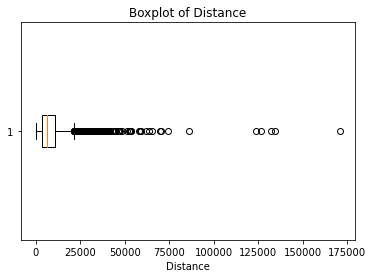

,order_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,predicted_distance,predicted_duration,change_reason_pricing,eu_indicator,fraud_score
1188,1578,2020-02-16 21:31:54,194483.52,15500.0,123934,3563,0,client,11922.0,1712.0,NaN,0,NaN
1315,134,2020-02-03 10:20:40,94.32,90.8,171119,8856,1,client,164512.0,8544.0,NaN,1,18.0
2033,2600,2020-02-27 09:11:55,86.98,79.9,134498,8889,1,client,131873.0,6743.0,NaN,1,0.0
2352,1484,2020-02-15 22:31:58,56.63,55.2,126657,6578,1,client,125384.0,6017.0,NaN,1,-20.0
4811,4146,2020-03-13 22:36:03,119.43,93.8,132018,7018,1,client,105347.0,5045.0,NaN,1,-1.0


In [16]:
plt.boxplot(data['distance'], vert=False)
plt.xlabel('Distance')
plt.title('Boxplot of Distance')
plt.show()
display(data[data['distance']>100000])

In [17]:
print('99 quantile of duration column is ',data['duration'].quantile(.99))

99 quantile of duration column is  5734.879999999999


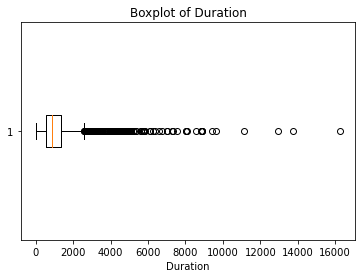

,order_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,predicted_distance,predicted_duration,change_reason_pricing,eu_indicator,fraud_score
114,1262,2020-02-14 18:40:08,59316.78,19500.0,24055,16266,0,client,14707.0,2605.0,NaN,0,NaN
1680,211,2020-02-04 10:18:37,81937.04,18500.0,41057,13768,0,client,14766.0,1929.0,NaN,0,NaN
1770,719,2020-02-09 00:54:11,63615.28,12500.0,28635,12961,1,client,9302.0,1106.0,NaN,0,NaN
2222,1275,2020-02-14 18:34:06,62913.02,49500.0,32181,11141,1,client,31270.0,4646.0,NaN,0,NaN


In [18]:
plt.boxplot(data['duration'], vert=False)
plt.xlabel('Duration')
plt.title('Boxplot of Duration')
plt.show()

display(data[data['duration']>10000])

In [19]:
# Dataframe size after all manipulations
data.shape

(2829, 13)

#### Conclusion
This step involves excluding unused features from the analysis. These are: 'b_state' (all statuses are finished), 'dest_change_number' (cannot be predicted before the ride), 'ticket_id_new' (not relevant for the current analysis), 'device_token' (not relevant for the current analysis), 'rider_app_version' (not relevant for the current analysis), 'driver_device_uid_new' (not relevant for the current analysis), 'order_state' (cannot be described), 'order_try_state' (cannot be described), 'driver_app_version' (not relevant for the current analysis), 'device_name' (not relevant for the current analysis), 'overpaid_ride_ticket' (not relevant for the current analysis), 'prediction_price_type' (not relevant for the current analysis), and 'order_try_id_new' (not relevant for the current analysis).

Another important part is deleting duplicated rows that appeared after excluding unused features. It should also be mentioned that a check was conducted for any mismatches in 'order_id_new' and 'order_try_id_new'.

As shown in the given dataset, some outliers exist. Due to the impossibility of identifying the nature of this deviation, this record will be left and considered as a rare type of order.

After all manipulations we have records of 2 829 rides. All analysis will be based on this data.

### Adding new features

In [20]:
# Adding new column with the target feature
data['price_check'] = data.apply(
    lambda row: 0 if row['upfront_price'] >= 0.8*row['metered_price'] 
                    and 
                     row['upfront_price'] <= 1.2*row['metered_price'] 
                  else 1, axis=1)

In [21]:
# Create additional columns for hour, week day, and month
data['hour'] = data['calc_created'].dt.hour
data['weekday'] = data['calc_created'].dt.weekday

In [22]:
# Additional column od difference between predicted and actual distance and duration and % of price mismatch
data['distance_diff'] = round(((data['distance'] - data['predicted_distance']) / data['predicted_distance'])*100,2)
data['duration_diff'] = round(((data['duration'] - data['predicted_duration']) / data['predicted_duration'])*100,2)
data['price_diff'] = round(((data['metered_price'] - data['upfront_price']) / data['upfront_price'])*100,2)

#### Conclusion

Here 5 new features were added. The first feature is the target feature - price_check. When the upfront_price differs significantly from the metered_price, the value of this feature is 1; otherwise, it is 0. The second and third features are the hour and weekday of the ride. The final two features are the difference between the predicted and actual distance and duration of the ride.

## Analysis.
### Correlation and main dependencies.

In this part, the main dependencies between features will be shown, and opportunities will be formulated. But firstly it is very important to show the percentage of failed predictions.

In [23]:
flagged_rides = data['price_check'].sum()
flagged_rides_pers = data['price_check'].sum() / data['order_id_new'].count()
print(f'Total number ofb rides, where upfront_price differs a lot\
 from metered_price in given dataset is:{flagged_rides},\n\
 it is {flagged_rides_pers:.1%} of total records.')

Total number ofb rides, where upfront_price differs a lot from metered_price in given dataset is:1103,
 it is 39.0% of total records.


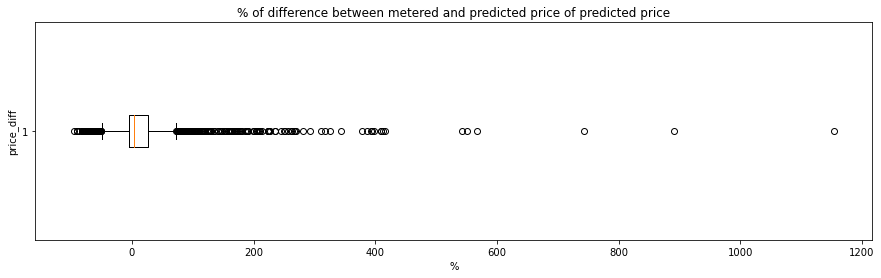

In [24]:
data_clean = data.dropna(subset=['price_diff'])
plt.figure(figsize=(15, 4)) # set the figure size to 8 inches by 6 inches
plt.boxplot(data_clean['price_diff'], vert=False)
plt.xlabel('%')
plt.ylabel('price_diff')
plt.title('% of difference between metered and predicted price of predicted price')
plt.show()

In [25]:
data_clean['price_diff'].describe()

count    2809.000000
mean       15.780082
std        59.689955
min       -96.000000
25%        -4.550000
50%         3.680000
75%        26.290000
max      1154.730000
Name: price_diff, dtype: float64

On the given plot we can see, the price prediction error. It has a long tail on the right. It means that the metered price was bigger than the upfront price. 50% of errors are between -4 and 26%, but at the same time, the maximum difference between the predicted and the meter price is more than a thousand percent.

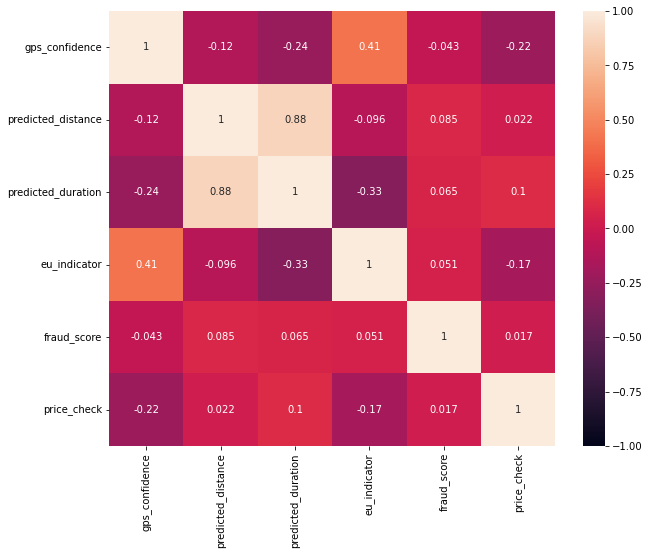

In [26]:
# Creating a heatmap that could show correlation of price prediction default and other features.
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data[['gps_confidence','entered_by',
                           'predicted_distance','predicted_duration',
                           'eu_indicator','fraud_score','price_check']].corr(),
                      vmin=-1, vmax=1, annot=True) 
plt.show()

According to the given heatmap, we can't identify any strong linear dependencies between features and the target feature. However, it is interesting to see a moderate relation between the eu indicator and GPS confidence. This correlation will be used later in the analysis.

The next step is to present the share of price prediction defaults from different perspectives. It will be a series of graphs where the feature values will be presented on the X-axis, while the frequency of the target feature will be on the Y-axis.

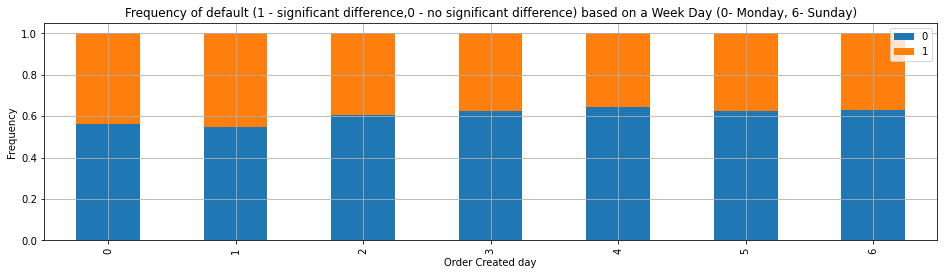

In [27]:
fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data.weekday, data.price_check)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title(f'Frequency of default (1 - significant difference,\
0 - no significant difference) based on a Week Day (0- Monday, 6- Sunday)')
ax.set_xlabel('Order Created day')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

Based on the data presented in this graph, we can say that there is no strong dependencie between week day and percentage of prediction mismatch.

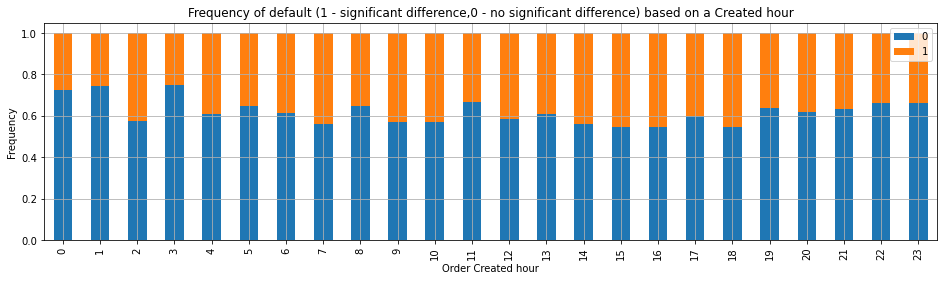

In [28]:
fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data.hour, data.price_check)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency of default (1 - significant difference,\
0 - no significant difference) based on a Created hour')
ax.set_xlabel('Order Created hour')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

Based on the data presented in this graph, we cant say that there is strong dependency between drive order hour and prediction mismatch, meanwhile during rush hour traffic percentage of defaulted predictions is increasing.

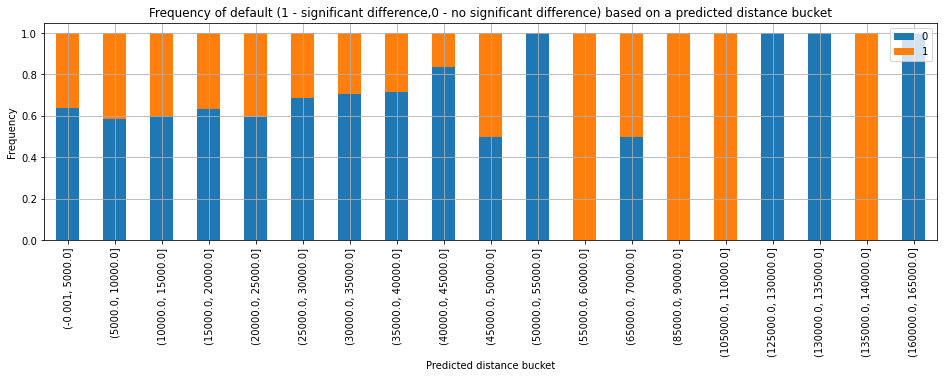

In [29]:
bins = np.arange(0, data.predicted_distance.max()+1, 5000)
data_binned = data.copy(deep= True)
data_binned['predicted_distance_binned'] = pd.cut(
    data_binned.predicted_distance, bins=bins, include_lowest=True)

fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data_binned.predicted_distance_binned, data_binned.price_check)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency of default (1 - significant difference,\
0 - no significant difference) based on a predicted distance bucket')
ax.set_xlabel('Predicted distance bucket')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

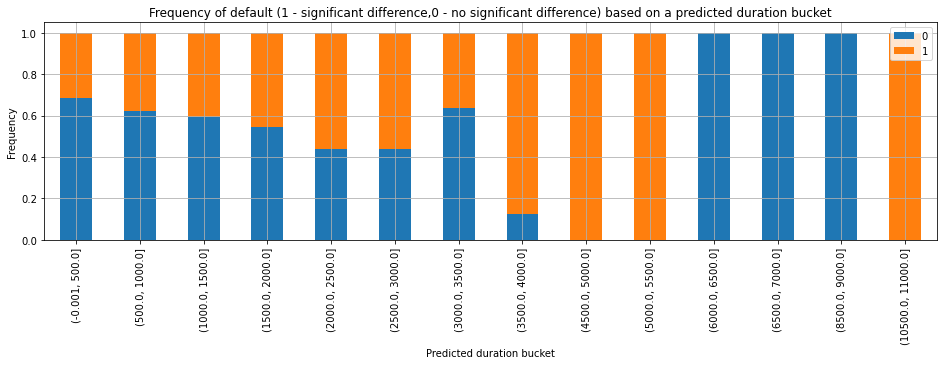

In [30]:
bins = np.arange(0, data.predicted_duration.max()+1, 500)
data_binned = data.copy(deep= True)
data_binned['predicted_duration_binned'] = pd.cut(
    data_binned.predicted_duration, bins=bins, include_lowest=True)

fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data_binned.predicted_duration_binned, data_binned.price_check)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency of default (1 - significant difference,\
0 - no significant difference) based on a predicted duration bucket')
ax.set_xlabel('Predicted duration bucket')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

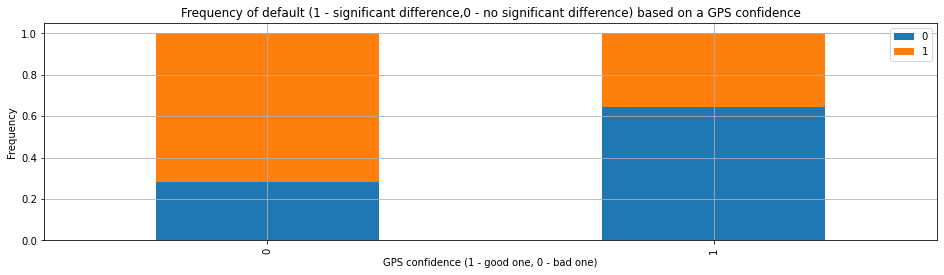

In [31]:
fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data.gps_confidence, data.price_check)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency of default (1 - significant difference,\
0 - no significant difference) based on a GPS confidence')
ax.set_xlabel('GPS confidence (1 - good one, 0 - bad one)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

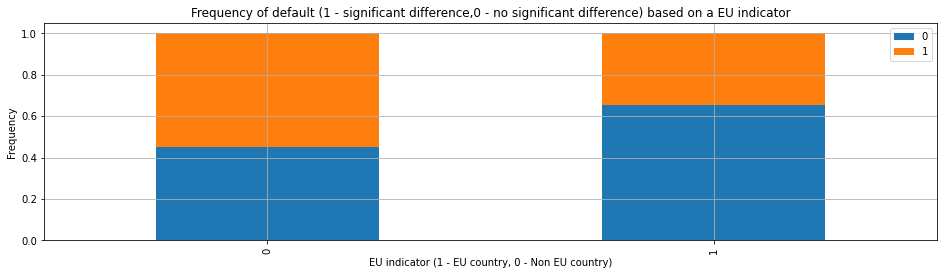

In [32]:
fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data.eu_indicator, data.price_check)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency of default (1 - significant difference,\
0 - no significant difference) based on a EU indicator')
ax.set_xlabel('EU indicator (1 - EU country, 0 - Non EU country)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

### Additional part dependencies between persentage of mismatch and features

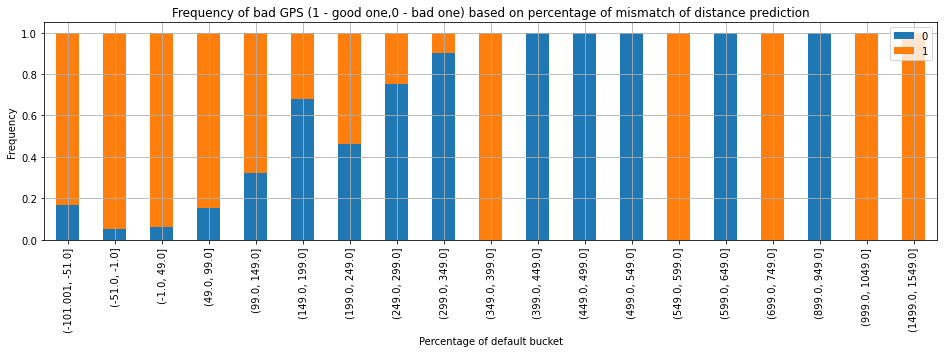

In [33]:
bins = np.arange(data.distance_diff.min()-1, data.distance_diff.max()+1, 50)
data_binned = data.copy(deep= True)
data_binned['distance_diff_binned'] = pd.cut(data_binned.distance_diff, bins=bins, include_lowest=True)

fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data_binned.distance_diff_binned, data_binned.gps_confidence)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency of bad GPS (1 - good one,\
0 - bad one) based on percentage of mismatch of distance prediction')
ax.set_xlabel('Percentage of default bucket')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

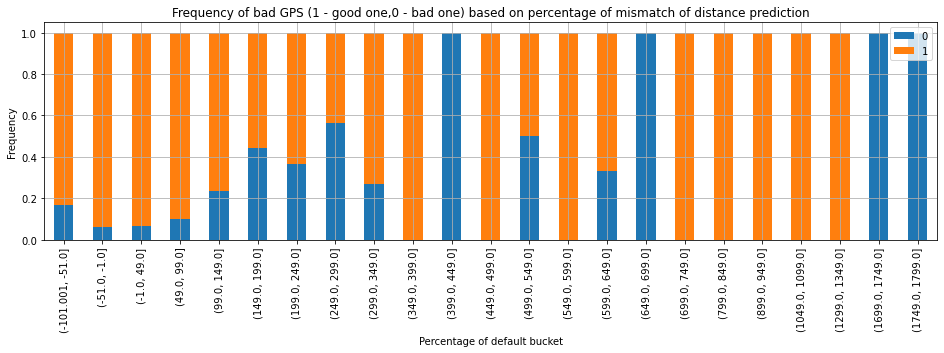

In [34]:
bins = np.arange(data.duration_diff.min()-1, data.duration_diff.max()+1, 50)
data_binned = data.copy(deep= True)
data_binned['duration_diff_binned'] = pd.cut(data_binned.duration_diff, bins=bins, include_lowest=True)

fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data_binned.duration_diff_binned, data_binned.gps_confidence)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency of bad GPS (1 - good one,\
0 - bad one) based on percentage of mismatch of distance prediction')
ax.set_xlabel('Percentage of default bucket')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

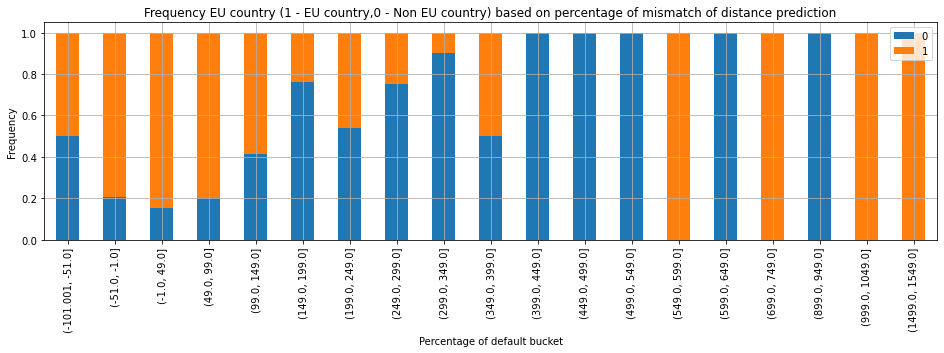

In [35]:
bins = np.arange(data.distance_diff.min()-1, data.distance_diff.max()+1, 50)
data_binned = data.copy(deep= True)
data_binned['distance_diff_binned'] = pd.cut(data_binned.distance_diff, bins=bins, include_lowest=True)

fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data_binned.distance_diff_binned, data_binned.eu_indicator)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency EU country (1 - EU country,\
0 - Non EU country) based on percentage of mismatch of distance prediction')
ax.set_xlabel('Percentage of default bucket')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

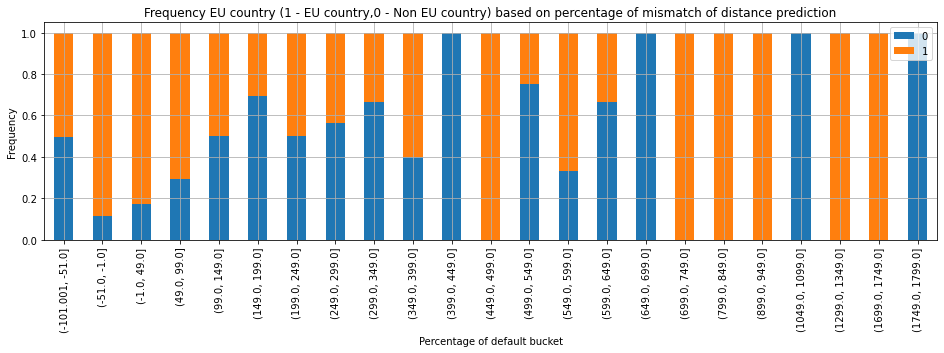

In [36]:
bins = np.arange(data.duration_diff.min()-1, data.duration_diff.max()+1, 50)
data_binned = data.copy(deep= True)
data_binned['duration_diff_binned'] = pd.cut(data_binned.duration_diff, bins=bins, include_lowest=True)

fig, ax = plt.subplots(figsize=(16, 4))
table = pd.crosstab(data_binned.duration_diff_binned, data_binned.eu_indicator)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax)
ax.set_title('Frequency EU country (1 - EU country,\
0 - Non EU country) based on percentage of mismatch of distance prediction')
ax.set_xlabel('Percentage of default bucket')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()

In [37]:
data.loc[(data['distance_diff']>200) | (data['duration_diff']>200)]

,order_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,predicted_distance,predicted_duration,change_reason_pricing,eu_indicator,fraud_score,price_check,hour,weekday,distance_diff,duration_diff,price_diff
20,201,2020-02-03 21:46:30,18929.92,6500.0,14560,1421,0,client,3789.0,538.0,NaN,0,NaN,1,21,0,284.27,164.13,191.23
87,864,2020-02-10 08:27:49,17239.02,7500.0,7151,5075,1,client,5077.0,787.0,NaN,0,-46.0,1,8,0,40.85,544.85,129.85
100,195,2020-02-03 20:06:19,7800.00,8000.0,566,401,1,client,577.0,113.0,NaN,0,NaN,0,20,0,-1.91,254.87,-2.50
109,991,2020-02-11 16:59:41,10219.98,6000.0,5804,1909,1,client,3376.0,633.0,NaN,0,NaN,1,16,1,71.92,201.58,70.33
114,1262,2020-02-14 18:40:08,59316.78,19500.0,24055,16266,0,client,14707.0,2605.0,NaN,0,NaN,1,18,4,63.56,524.41,204.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4641,2878,2020-02-29 19:08:47,19.28,3.9,1057,7295,1,client,4628.0,506.0,NaN,1,0.0,1,19,5,-77.16,1341.70,394.36
4669,607,2020-02-08 01:48:23,13216.98,6000.0,7918,2503,1,client,2344.0,340.0,NaN,0,NaN,1,1,5,237.80,636.18,120.28
4730,860,2020-02-10 06:42:48,12.40,4.7,7895,1143,1,client,2321.0,369.0,NaN,1,-294.0,1,6,0,240.16,209.76,163.83
4771,696,2020-02-08 18:17:31,15.15,4.3,15166,2230,1,client,3810.0,488.0,NaN,1,NaN,1,18,5,298.06,356.97,252.33


### Conclusion

It has been found that the number of incorrect predictions increases during rush hour traffic. The number of errors also increases for long trips (when the distance is greater than 45000 or the duration is longer than 3000). Special attention should be given to trips outside of the EU or in areas with poor GPS signal. The proportion of such rides from the total number of rides is not very large, however, the percentage of defaults is higher. And as it was mentioned earlyer, there is some dependencie between these two facts.

Based on the presented facts, possible scenarios could include changes to the predictive model used and retraining it on corner cases. Alternatively, a separate model could be created, trained on such special cases.

Also it is important to highlight cases where the difference between the predicted and actual distance or duration is more than 200%. Such cases require separate analysis as they could have a negative impact on the user experience. However, this is a topic for another more detailed analysis that requires more context from data perspective.

## Addition. Mashine learning model

In this part, a simple machine learning model will be presented. It will be used to show the plot_importnce and plot_tree in the end and indicate which parameters are the most important for the models prediction.

In [38]:
df = data[['gps_confidence','predicted_distance',
           'predicted_duration','eu_indicator',
           'price_check', 'hour', 'weekday']]

In [39]:
target = df['price_check']
features = df.drop('price_check', axis = 1)

In [40]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, train_size= .6,stratify = target, random_state=RND)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, train_size= .5, random_state=RND)

In [41]:
print('features_train shape',features_train.shape)
print('target_train shape',target_train.shape)
print('features_test shape', features_test.shape)
print('target_test shape', target_test.shape)
print('features_valid shape', features_valid.shape)
print('target_valid shape', target_valid.shape)

features_train shape (1697, 6)
target_train shape (1697,)
features_test shape (566, 6)
target_test shape (566,)
features_valid shape (566, 6)
target_valid shape (566,)


In [42]:
dtrain = xgb.DMatrix(features_train, label=target_train)
dtest = xgb.DMatrix(features_test, label=target_test)
dvalid = xgb.DMatrix(features_valid, label=target_valid)

In [43]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'random_state' : RND
}

num_rounds = 100
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [44]:
model = xgb.train(params, dtrain, num_rounds, watchlist, early_stopping_rounds=10, verbose_eval=False)

/Users/maksimkeller/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [45]:
predictions = model.predict(dtest)
accuracy = accuracy_score(target_test, predictions.round())
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.61


In [46]:
# Model usability test
clf = DummyClassifier(strategy='uniform')
clf.fit(features_train, target_train)
predictions = clf.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


Given that the DummyClassifier model has a lower accuracy score, the predictions of the gradient boosting model XGboost are useful.

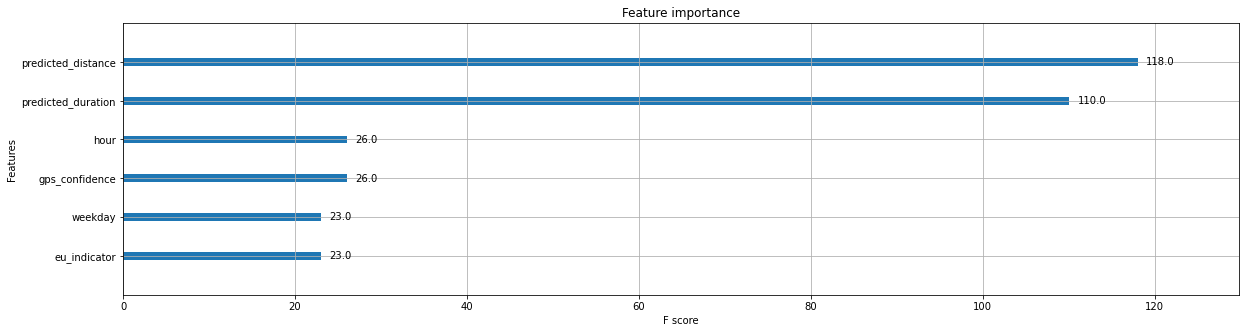

In [47]:
fig, ax = plt.subplots(figsize=(20, 5))
xgb.plot_importance(model, ax=ax)
plt.show()

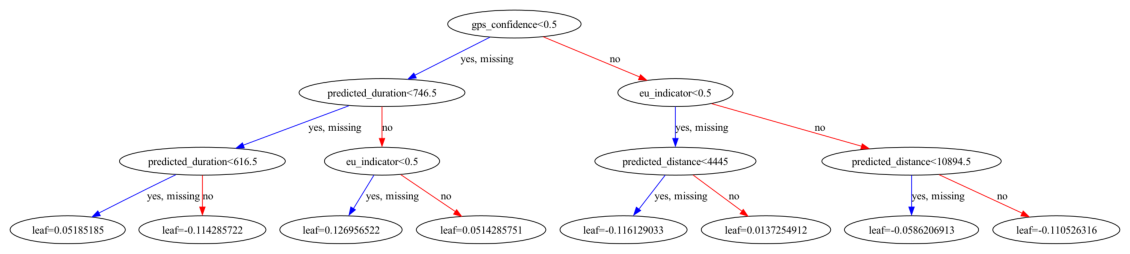

In [48]:
tree_index = 0
fig, ax = plt.subplots(figsize=(20, 5))
xgb.plot_tree(model, num_trees=tree_index, ax=ax)
plt.show()

### Conclusion

Here it is important to highlight feature importance given by model. As we could see, for the prediction most important are predicted distance and duration meanwhile hour, day,country and gps signal are still important in prediction.

## Conclusion

This analysis is about finding ways to improve upfront pricing precision to increase customer satisfaction. One of the main aspect of satisfied customer - predictable expectations, especially in question of product price. Current upfront pricing standarts meaning to predict ride price with difference not more than 20%. As of some of predictions are outcide of this standart was inicialized current analysis that should find ways to improve prediction accuracy. 
In "Introduction" chapter background and main plan were presented. During second chapter named "Data preparation and data cleaning" several manipulations with dataset were made. In this part table with the main description was presented, showing main statistical parameters such as mean, median, 25%, 75%, max, min, and std for numeric features, and unique, top, and frequency for categorical features. Also some insights about given data was presented. Such as that in the given dataframe gps confidence is bad in 10% cases, ride was outcide the EU in 22% cases and many others.


It is important to keep in mind that in the report was used data from 22-02-2020 until 03-03-2020. After data cleaning 2829 records left. 

In ways to identify opportunities that can help improve upfront precision was used 5 new features such as: week day and hour of an ride, target feature - price_check. When the upfront_price differs significantly from the metered_price, the value of this feature is 1; otherwise, it is 0. The final two features are the difference between the predicted and actual distance and duration of the ride in percentage.

During next chapter it was determined that the number of incorrect predictions increases during rush hour traffic. The number of errors also increases for long trips (when the distance is greater than 45000 or the duration is longer than 3000). Special attention should be given to trips outside of the EU or in areas with poor GPS signal. The proportion of such rides from the total number of rides is not very large, however, the percentage of defaults is higher. And as it was mentioned earlier, there is some dependencie between these two facts.

Based on the presented facts, possible scenarios could include changes to the predictive model used and retraining it on corner cases. Alternatively, a separate model could be created, trained on such special cases.

Also it is important to highlight cases where the difference between the predicted and actual distance or duration is more than 200%. Such cases require separate analysis as they could have a negative impact on the user experience. However, this is a topic for another more detailed analysis that requires more context from data perspective. It is one of the ways of improoving current analysis.

As a conclusion it is important to say that it is important to continue exploring ways to improve the accuracy of ride price predictions to meet customer expectations and provide a positive user experience.